**PROJECT 3: STUDENT PERFORMANCE USING MULTIPLE LINEAR REGRESSION**


***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

***Loading Dataset***

In [2]:
df=pd.read_csv('/content/Student_Performance.csv')
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


***Columns of dataset.***

In [3]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

***Printing first and Last 5 rows.***

In [4]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
df.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


***Checking the number of missing values.***

In [6]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

***Shape of Dataset.***

In [7]:
df.shape

(10000, 6)

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


***Encoding the Dataset.***

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Extracurricular Activities']=le.fit_transform(df['Extracurricular Activities'])
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


***Seperating x as input label and y as output label.***

In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

***Plot each independent variable with dependent variable using Seaborn.***

**** Hours Studied Vs Performance Index.***

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

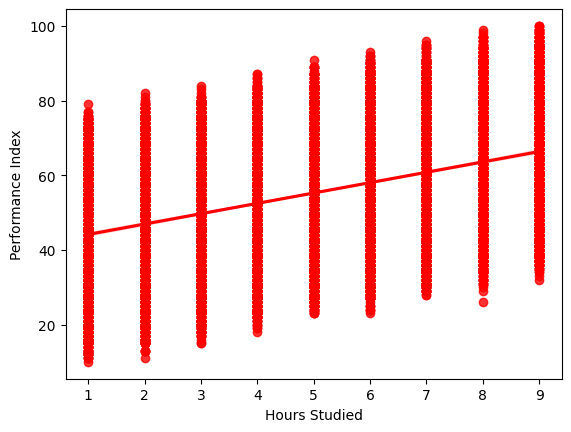

In [11]:
sns.regplot(x=df['Hours Studied'],y=y,color='red')

**** Previous Scores Vs Performance Index.***

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

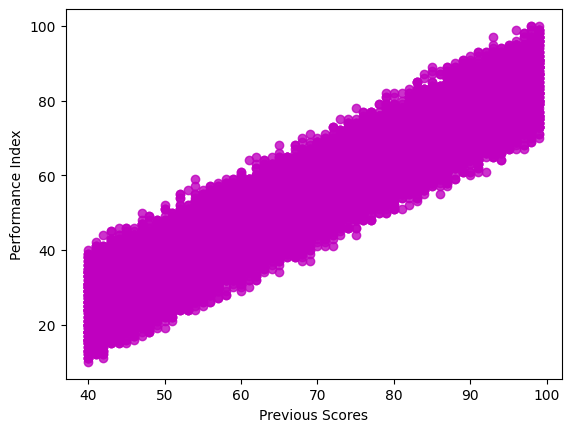

In [12]:
sns.regplot(x=df['Previous Scores'],y=y,color='m')

**** Extracurricular Activities Vs Performance Index.***

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

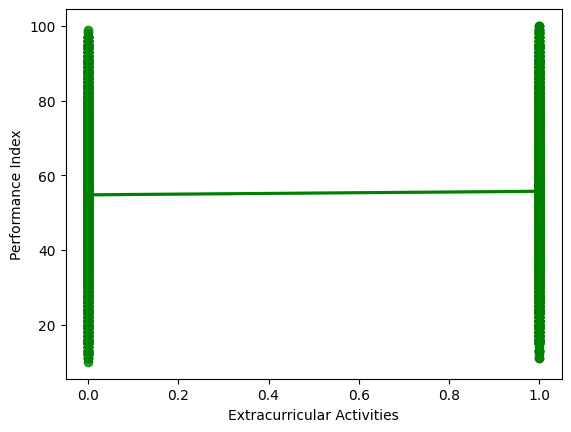

In [13]:
sns.regplot(x=df['Extracurricular Activities'],y=y,color='g')

**** Sleep Hours Vs Performance Index***

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

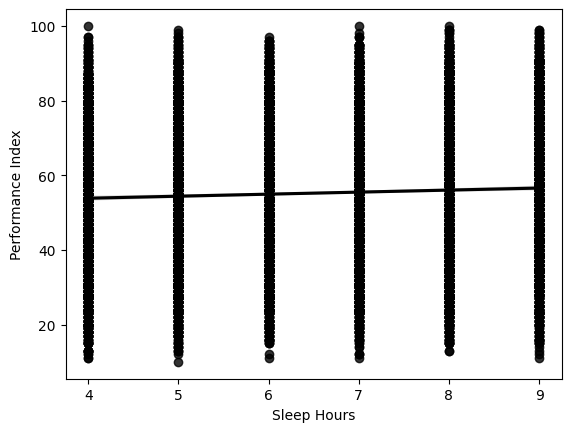

In [14]:
sns.regplot(x=df['Sleep Hours'],y=y,color='k')

**** Sample Question Papers Practiced Vs Performance Index.***

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

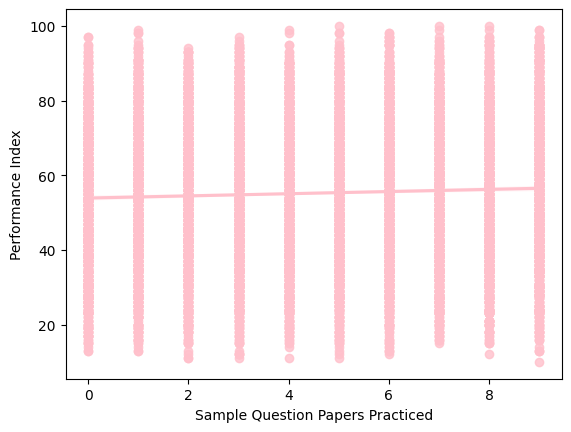

In [15]:
sns.regplot(x=df['Sample Question Papers Practiced'],y=y,color='pink')

***Splitting the dataset into Training and Testing Data.***

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

***Model Creation.***

In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

***Creation of DataFrame.***

In [18]:
values={'actual_value':y_test,'predicted_value':y_pred,'difference':y_test-y_pred}
df1=pd.DataFrame(values)
df1

,actual_value,predicted_value,difference
6252,51.0,54.747286,-3.747286
4684,20.0,22.618844,-2.618844
1731,46.0,47.936651,-1.936651
4742,28.0,31.340099,-3.340099
4521,41.0,43.059743,-2.059743
...,...,...,...
8014,32.0,31.819775,0.180225
1074,40.0,37.503045,2.496955
3063,33.0,33.424518,-0.424518
6487,69.0,67.925790,1.074210


***Slope and Constant.***

In [19]:
print("Slope is")
list(zip(x,model.coef_))

Slope is


[('Hours Studied', 2.8589522305235064),
 ('Previous Scores', 1.0155197942880816),
 ('Extracurricular Activities', 0.5817128541736178),
 ('Sleep Hours', 0.47967675981703317),
 ('Sample Question Papers Practiced', 0.19039415655051053)]

In [20]:
print("constant is",model.intercept_)

constant is -33.836543807141744


***Performance Evaluation.(MAE,MAPE,MSE,r2_score)***

In [23]:
from sklearn.metrics import mean_absolute_error
print("MAE Is ",mean_absolute_error(y_test,y_pred))

MAE Is  1.6090437564045217


In [21]:
from sklearn.metrics import mean_absolute_percentage_error
print("MAPE Is ",mean_absolute_percentage_error(y_test,y_pred))

MAPE Is  0.03504200252156806


In [24]:
from sklearn.metrics import mean_squared_error
print("MSE is ",mean_squared_error(y_test,y_pred))

MSE Is  4.066563824092682


In [22]:
from sklearn.metrics import r2_score
print("r2 score Is ",r2_score(y_test,y_pred))

r2 score Is  0.9890110607021136
